**Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval

Lets Load Data

In [2]:
movies = pd.read_csv('tmdb_5000_movies.csv')
credits = pd.read_csv('tmdb_5000_credits.csv')

The first dataset contains the following features:-

- movie_id - A unique identifier for each movie.<br>
- cast - The name of lead and supporting actors.<br>
- crew - The name of Director, Editor, Composer, Writer etc.<br>

The second dataset has the following features:-<br>

- budget - The budget in which the movie was made.<br>
- genre - The genre of the movie, Action, Comedy ,Thriller etc.<br>
- homepage - A link to the homepage of the movie.<br>
- id - This is infact the movie_id as in the first dataset.<br>
- keywords - The keywords or tags related to the movie.<br>
- original_language - The language in which the movie was made.<br>
- original_title - The title of the movie before translation or adaptation.<br>
- overview - A brief description of the movie.<br>
- popularity - A numeric quantity specifying the movie popularity.<br>
- production_companies - The production house of the movie.<br>
- production_countries - The country in which it was produced.<br>
- release_date - The date on which it was released.<br>
- revenue - The worldwide revenue generated by the movie.<br>
- runtime - The running time of the movie in minutes.<br>
- status - "Released" or "Rumored".<br>
- tagline - Movie's tagline.<br>
- title - Title of the movie.<br>
- vote_average - average ratings the movie recieved.<br>
- vote_count - the count of votes recieved.<br>

In [3]:
movies.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

We will be Droping the columns which is not required in the dataset

In [4]:
movies.drop(['homepage' , 'production_companies' , 'production_countries' , 'spoken_languages','keywords'] , axis=1 , inplace=True)

In [5]:
movies.columns

Index(['budget', 'genres', 'id', 'original_language', 'original_title',
       'overview', 'popularity', 'release_date', 'revenue', 'runtime',
       'status', 'tagline', 'title', 'vote_average', 'vote_count'],
      dtype='object')

In [6]:
movies.head()

,budget,genres,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2787965087,162.0,Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,961000000,169.0,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,880674609,148.0,Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,2012-07-16,1084939099,165.0,Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,2012-03-07,284139100,132.0,Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [7]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


**Lets Merge the two datasets.**

In [8]:
credits.rename(columns={'movie_id':'id'} , inplace=True)
credits.head()

,id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [9]:
credits.columns = ['id' ,'tittle' , 'cast' , 'crew']
movies = movies.merge(credits, on='id')
movies.columns

Index(['budget', 'genres', 'id', 'original_language', 'original_title',
       'overview', 'popularity', 'release_date', 'revenue', 'runtime',
       'status', 'tagline', 'title', 'vote_average', 'vote_count', 'tittle',
       'cast', 'crew'],
      dtype='object')

In [10]:
movies.head()

,budget,genres,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,tittle,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2787965087,162.0,Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,961000000,169.0,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,880674609,148.0,Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,2012-07-16,1084939099,165.0,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,2012-03-07,284139100,132.0,Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


# Data Wrangling

In [11]:
movies['genres'] = movies['genres'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])


In [12]:
movies['cast'] = movies['cast'].fillna('[]').apply(literal_eval).apply(lambda x: [i['character'] for i in x] if isinstance(x, list) else [])

In [13]:
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [14]:
movies['director'] = movies['crew'].apply(literal_eval).apply(get_director)

In [15]:
movies.head()

,budget,genres,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,tittle,cast,crew,director
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",19995,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2787965087,162.0,Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[Jake Sully, Neytiri, Dr. Grace Augustine, Col...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",James Cameron
1,300000000,"[Adventure, Fantasy, Action]",285,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,961000000,169.0,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[Captain Jack Sparrow, Will Turner, Elizabeth ...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",Gore Verbinski
2,245000000,"[Action, Adventure, Crime]",206647,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,880674609,148.0,Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[James Bond, Blofeld, Madeleine, M, Lucia, Q, ...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",Sam Mendes
3,250000000,"[Action, Crime, Drama, Thriller]",49026,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,2012-07-16,1084939099,165.0,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[Bruce Wayne / Batman, Alfred Pennyworth, Jame...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",Christopher Nolan
4,260000000,"[Action, Adventure, Science Fiction]",49529,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,2012-03-07,284139100,132.0,Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[John Carter, Dejah Thoris, Sola, Tars Tarkas,...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",Andrew Stanton


In [16]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 19 columns):
budget               4803 non-null int64
genres               4803 non-null object
id                   4803 non-null int64
original_language    4803 non-null object
original_title       4803 non-null object
overview             4800 non-null object
popularity           4803 non-null float64
release_date         4802 non-null object
revenue              4803 non-null int64
runtime              4801 non-null float64
status               4803 non-null object
tagline              3959 non-null object
title                4803 non-null object
vote_average         4803 non-null float64
vote_count           4803 non-null int64
tittle               4803 non-null object
cast                 4803 non-null object
crew                 4803 non-null object
director             4773 non-null object
dtypes: float64(3), int64(4), object(12)
memory usage: 750.5+ KB


In [17]:
movies.isnull().sum()

budget                 0
genres                 0
id                     0
original_language      0
original_title         0
overview               3
popularity             0
release_date           1
revenue                0
runtime                2
status                 0
tagline              844
title                  0
vote_average           0
vote_count             0
tittle                 0
cast                   0
crew                   0
director              30
dtype: int64

In [18]:
#movies.drop(['title_y' , 'crew_y' , 'cast_y'] , axis = 1,inplace=True)

In [19]:
movies.drop(['tagline','tittle','crew' , 'original_title'],axis=1,inplace=True)

In [20]:
#movies.drop(['tittle'],axis=1,inplace=True)

In [21]:
movies.head()

,budget,genres,id,original_language,overview,popularity,release_date,revenue,runtime,status,title,vote_average,vote_count,cast,director
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",19995,en,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2787965087,162.0,Released,Avatar,7.2,11800,"[Jake Sully, Neytiri, Dr. Grace Augustine, Col...",James Cameron
1,300000000,"[Adventure, Fantasy, Action]",285,en,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,961000000,169.0,Released,Pirates of the Caribbean: At World's End,6.9,4500,"[Captain Jack Sparrow, Will Turner, Elizabeth ...",Gore Verbinski
2,245000000,"[Action, Adventure, Crime]",206647,en,A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,880674609,148.0,Released,Spectre,6.3,4466,"[James Bond, Blofeld, Madeleine, M, Lucia, Q, ...",Sam Mendes
3,250000000,"[Action, Crime, Drama, Thriller]",49026,en,Following the death of District Attorney Harve...,112.312950,2012-07-16,1084939099,165.0,Released,The Dark Knight Rises,7.6,9106,"[Bruce Wayne / Batman, Alfred Pennyworth, Jame...",Christopher Nolan
4,260000000,"[Action, Adventure, Science Fiction]",49529,en,"John Carter is a war-weary, former military ca...",43.926995,2012-03-07,284139100,132.0,Released,John Carter,6.1,2124,"[John Carter, Dejah Thoris, Sola, Tars Tarkas,...",Andrew Stanton


In [22]:
#movies.isnull().sum()

In [23]:
movies = movies.dropna()

In [24]:
movies.isnull().sum()

budget               0
genres               0
id                   0
original_language    0
overview             0
popularity           0
release_date         0
revenue              0
runtime              0
status               0
title                0
vote_average         0
vote_count           0
cast                 0
director             0
dtype: int64

(-57625000.0, 98575000.0, 39050000.0)

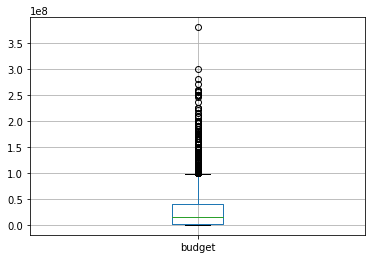

In [25]:
movies.boxplot('budget')
IQR = movies.budget.quantile(0.75)-movies.budget.quantile(0.25)
lower_fence1 = movies.budget.quantile(0.25) - (IQR*1.5)
higher_fence1 = movies.budget.quantile(0.75) + (IQR*1.5)
lower_fence1,higher_fence1,IQR

(-140518878.375, 234198130.625, 93679252.25)

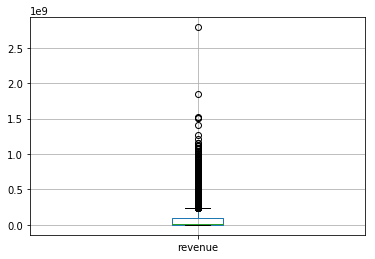

In [26]:
movies.boxplot('revenue')
IQR = movies.revenue.quantile(0.75)-movies.revenue.quantile(0.25)
lower_fence = movies.revenue.quantile(0.25) - (IQR*1.5)
higher_fence = movies.revenue.quantile(0.75) + (IQR*1.5)
lower_fence,higher_fence,IQR

In [27]:
movies.loc[movies.budget >= higher_fence1 , 'budget'] = higher_fence1
movies.loc[movies.revenue >= higher_fence , 'revenue'] = higher_fence

(-140518878.375, 234198130.625, 93679252.25)

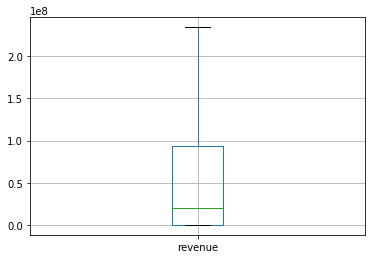

In [28]:
movies.boxplot('revenue')
IQR = movies.revenue.quantile(0.75)-movies.revenue.quantile(0.25)
lower_fence = movies.revenue.quantile(0.25) - (IQR*1.5)
higher_fence = movies.revenue.quantile(0.75) + (IQR*1.5)
lower_fence,higher_fence,IQR

(-57625000.0, 98575000.0, 39050000.0)

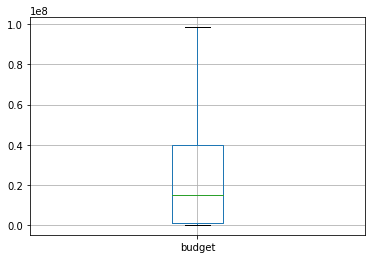

In [29]:
movies.boxplot('budget')
IQR = movies.budget.quantile(0.75)-movies.budget.quantile(0.25)
lower_fence1 = movies.budget.quantile(0.25) - (IQR*1.5)
higher_fence1 = movies.budget.quantile(0.75) + (IQR*1.5)
lower_fence1,higher_fence1,IQR

# Top 10 most buget movie

In [30]:
movies.columns

Index(['budget', 'genres', 'id', 'original_language', 'overview', 'popularity',
       'release_date', 'revenue', 'runtime', 'status', 'title', 'vote_average',
       'vote_count', 'cast', 'director'],
      dtype='object')

In [31]:
movies.head()

,budget,genres,id,original_language,overview,popularity,release_date,revenue,runtime,status,title,vote_average,vote_count,cast,director
0,98575000.0,"[Action, Adventure, Fantasy, Science Fiction]",19995,en,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2.341981e+08,162.0,Released,Avatar,7.2,11800,"[Jake Sully, Neytiri, Dr. Grace Augustine, Col...",James Cameron
1,98575000.0,"[Adventure, Fantasy, Action]",285,en,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,2.341981e+08,169.0,Released,Pirates of the Caribbean: At World's End,6.9,4500,"[Captain Jack Sparrow, Will Turner, Elizabeth ...",Gore Verbinski
2,98575000.0,"[Action, Adventure, Crime]",206647,en,A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,2.341981e+08,148.0,Released,Spectre,6.3,4466,"[James Bond, Blofeld, Madeleine, M, Lucia, Q, ...",Sam Mendes
3,98575000.0,"[Action, Crime, Drama, Thriller]",49026,en,Following the death of District Attorney Harve...,112.312950,2012-07-16,2.341981e+08,165.0,Released,The Dark Knight Rises,7.6,9106,"[Bruce Wayne / Batman, Alfred Pennyworth, Jame...",Christopher Nolan
4,98575000.0,"[Action, Adventure, Science Fiction]",49529,en,"John Carter is a war-weary, former military ca...",43.926995,2012-03-07,2.341981e+08,132.0,Released,John Carter,6.1,2124,"[John Carter, Dejah Thoris, Sola, Tars Tarkas,...",Andrew Stanton


### 1.Movies With Best Vote Average

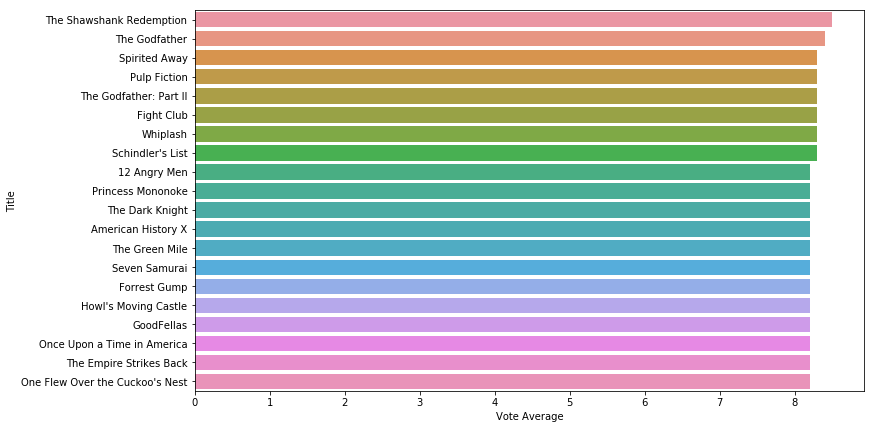

In [32]:
data = movies[['title' , 'vote_average' , 'vote_count']]
data = data[data['vote_count'] >= 250]
data = data.sort_values('vote_average' , ascending = False).nlargest(20 , columns = 'vote_average')
plt.figure(figsize=(12,7))
sns.barplot(x = 'vote_average' , y = 'title' , data = data)
plt.xlabel('Vote Average')
plt.ylabel('Title')
plt.show()

## 2. Movies with highest Vote Count

In [33]:
data = movies[['title' , 'vote_count']]
data.sort_values('vote_count' , ascending = False).nlargest(10 , columns = 'vote_count').set_index('title')
#sns.barplot(x = 'vote_count' , y = 'title' , data = data)


,vote_count
title,
Inception,13752
The Dark Knight,12002
Avatar,11800
The Avengers,11776
Deadpool,10995
Interstellar,10867
Django Unchained,10099
Guardians of the Galaxy,9742
The Hunger Games,9455


In [34]:
data = movies[['budget' , 'title']]


In [35]:
data.rename(columns = {'original_title' : 'movie_title'} , inplace = True)

C:\Users\HP\Anaconda3\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [36]:
data.head()

,budget,title
0,98575000.0,Avatar
1,98575000.0,Pirates of the Caribbean: At World's End
2,98575000.0,Spectre
3,98575000.0,The Dark Knight Rises
4,98575000.0,John Carter


In [37]:
data = data.sort_values('budget' , ascending=False).head(10)
data

,budget,title
0,98575000.0,Avatar
205,98575000.0,Sherlock Holmes: A Game of Shadows
224,98575000.0,RoboCop
223,98575000.0,The Chronicles of Riddick
222,98575000.0,Elysium
221,98575000.0,Stuart Little 2
220,98575000.0,Prometheus
219,98575000.0,Charlie's Angels: Full Throttle
218,98575000.0,Jason Bourne
217,98575000.0,Ghost Rider


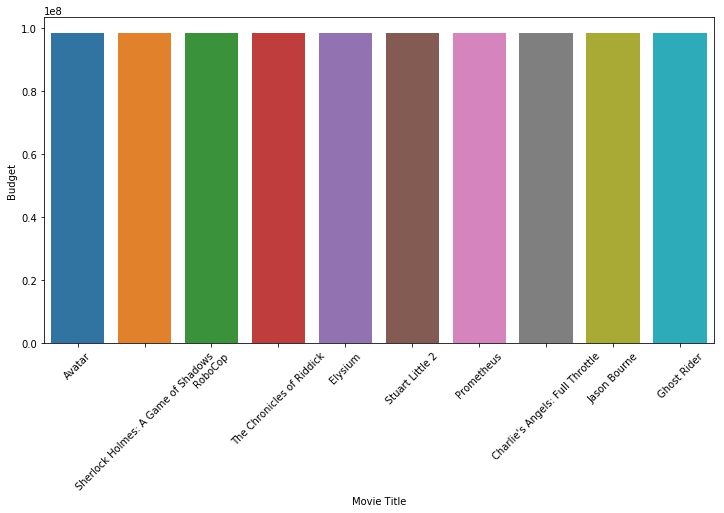

In [38]:
plt.figure(figsize=(12,6))
sns.barplot(x= 'title' , y = 'budget' , data=data)
plt.xlabel('Movie Title')
plt.ylabel('Budget')
plt.xticks(rotation = 45)
plt.show()

## Most Popular Movie

In [39]:
data = movies[["popularity" , 'title']]
data.head()

,popularity,title
0,150.437577,Avatar
1,139.082615,Pirates of the Caribbean: At World's End
2,107.376788,Spectre
3,112.312950,The Dark Knight Rises
4,43.926995,John Carter


In [40]:
data = data.sort_values('popularity' , ascending=False).head(10)
data

,popularity,title
546,875.581305,Minions
95,724.247784,Interstellar
788,514.569956,Deadpool
94,481.098624,Guardians of the Galaxy
127,434.278564,Mad Max: Fury Road
28,418.708552,Jurassic World
199,271.972889,Pirates of the Caribbean: The Curse of the Bla...
82,243.791743,Dawn of the Planet of the Apes
200,206.227151,The Hunger Games: Mockingjay - Part 1
88,203.734590,Big Hero 6


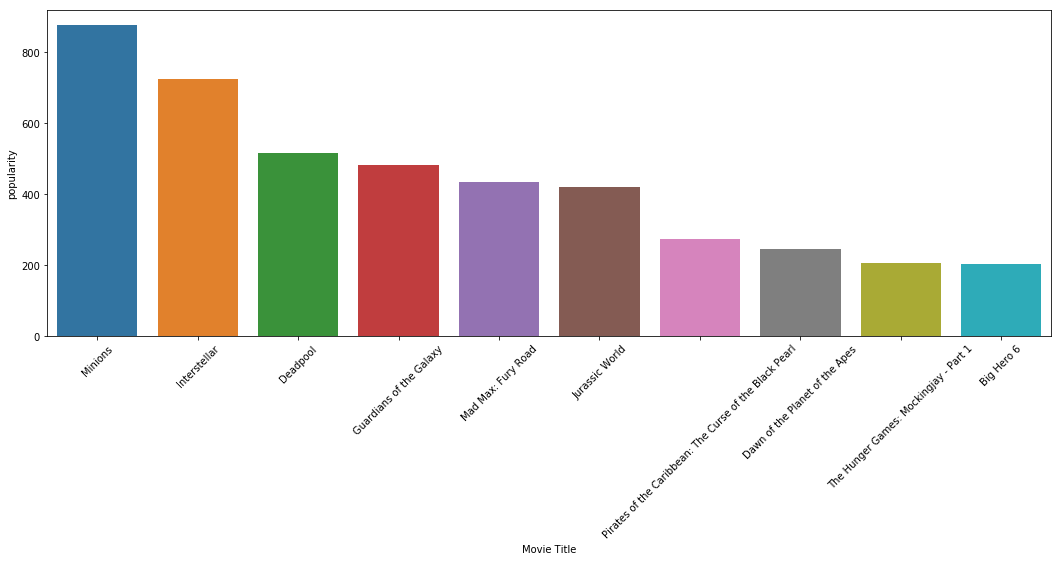

In [41]:
plt.figure(figsize=(18,6))
sns.barplot(x = 'title' , y='popularity' , data =data)

plt.xlabel('Movie Title')
plt.ylabel("popularity")
plt.xticks(rotation = 45)
plt.show()

## Top 10 Best Imdb Rated Movie

In [42]:
data = movies[['genres' ,'title']]
data

,genres,title
0,"[Action, Adventure, Fantasy, Science Fiction]",Avatar
1,"[Adventure, Fantasy, Action]",Pirates of the Caribbean: At World's End
2,"[Action, Adventure, Crime]",Spectre
3,"[Action, Crime, Drama, Thriller]",The Dark Knight Rises
4,"[Action, Adventure, Science Fiction]",John Carter
5,"[Fantasy, Action, Adventure]",Spider-Man 3
6,"[Animation, Family]",Tangled
7,"[Action, Adventure, Science Fiction]",Avengers: Age of Ultron
8,"[Adventure, Fantasy, Family]",Harry Potter and the Half-Blood Prince
9,"[Action, Adventure, Fantasy]",Batman v Superman: Dawn of Justice


In [43]:
movies.columns

Index(['budget', 'genres', 'id', 'original_language', 'overview', 'popularity',
       'release_date', 'revenue', 'runtime', 'status', 'title', 'vote_average',
       'vote_count', 'cast', 'director'],
      dtype='object')

In [44]:
from ast import literal_eval

features = ['cast' , 'crew' , 'genres']
for feature in features:
    movies[feature] = movies[feature].apply(literal_eval)

ValueError: malformed node or string: ['Jake Sully', 'Neytiri', 'Dr. Grace Augustine', 'Col. Quaritch', 'Trudy Chacon', 'Selfridge', 'Norm Spellman', 'Moat', 'Eytukan', "Tsu'Tey", 'Dr. Max Patel', 'Lyle Wainfleet', 'Private Fike', 'Cryo Vault Med Tech', 'Venture Star Crew Chief', 'Lock Up Trooper', 'Shuttle Pilot', 'Shuttle Co-Pilot', 'Shuttle Crew Chief', 'Tractor Operator / Troupe', 'Dragon Gunship Pilot', 'Dragon Gunship Gunner', 'Dragon Gunship Navigator', 'Suit #1', 'Suit #2', 'Ambient Room Tech', 'Ambient Room Tech / Troupe', 'Horse Clan Leader', 'Link Room Tech', 'Basketball Avatar / Troupe', 'Basketball Avatar', "Na'vi Child", 'Troupe', 'Troupe', 'Troupe', 'Troupe', 'Troupe', 'Troupe', 'Troupe', 'Troupe', 'Troupe', 'Troupe', 'Troupe', 'Troupe', 'Op Center Staff', 'Op Center Staff', 'Op Center Staff', 'Op Center Staff', 'Op Center Staff', 'Op Center Duty Officer', 'Op Center Staff', 'Dancer', 'Dancer', 'Dancer', 'Dancer', 'Dancer', 'Dancer', 'Dancer', 'Dancer', 'Dancer', 'Mining Chief (uncredited)', 'Veteran Miner (uncredited)', 'Richard (uncredited)', "Nav'i (uncredited)", 'Trooper (uncredited)', 'Trooper (uncredited)', 'Ground Technician (uncredited)', 'Flight Crew Mechanic (uncredited)', 'Samson Pilot', 'Trooper (uncredited)', 'Banshee (uncredited)', 'Soldier (uncredited)', 'Blast Technician (uncredited)', 'Vindum Raah (uncredited)', 'Hero (uncredited)', 'Ops Centreworker (uncredited)', 'Engineer (uncredited)', "Col. Quaritch's Mech Suit (uncredited)", 'Female Marine (uncredited)', 'Ikran Clan Leader (uncredited)', 'Geologist (uncredited)', "Na'vi (uncredited)", 'Ambient Room Tech / Troupe']

In [ ]:
movies.head()

In [ ]:
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [ ]:
movies['director'] = movies['crew'].apply(get_director)

In [ ]:
movies['director']

In [ ]:
def get_list(x):
    if isinstance(x,list):
        names = [i['name'] for i in x]
        return names
    return []

In [ ]:
features = ['cast' , 'genres']
for feature in features:
    movies[feature] = movies[feature].apply(get_list)

In [ ]:
movies.cast

In [ ]:
movies[['cast' , 'director' , 'genres']].head()

In [ ]:
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [ ]:
features = ['cast' , 'director' , 'genres']
for feature in features:
    movies[feature] = movies[feature].apply(clean_data)

In [ ]:
movies.head()

In [ ]:
def create_soup(x):
    return ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])

movies['soup'] = movies.apply(create_soup, axis=1)


In [ ]:
movies.head()